In [65]:
import pygad

        #0  1  2  3  4  5  6  7  8  9  10 11
maze = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #0
        [0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], #1
        [0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0], #2
        [0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0], #3
        [0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0], #4
        [0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0], #5
        [0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0], #6
        [0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0], #7
        [0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0], #8
        [0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0], #9
        [0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0], #10
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]] #11
        #0  1  2  3  4  5  6  7  8  9  10 11

start = (1, 1)
end = (10, 10)


In [66]:
#definiujemy parametry chromosomu
#0 - góra, 1 - prawo, 2 - dół, 3 - lewo
gene_space = [0, 1, 2, 3] 

In [67]:
def path(solution):
    counter = 0
    walls = 0
    backtracks = 0
    x, y = start
    for i in range(len(solution)):
        if solution[i] == 0:
            if maze[y-1][x] == 1:
                if i != 0 and solution[i-1] == 2:
                    backtracks += 1
                else: 
                    y -= 1
            else:
                walls += 1
        elif solution[i] == 1:
            if maze[y][x+1] == 1:
                if i != 0 and solution[i-1] == 3:
                    backtracks += 1
                else: 
                    x += 1
            else:
                walls += 1
        elif solution[i] == 2:
            if maze[y+1][x] == 1:
                if i != 0 and solution[i-1] == 0:
                    backtracks += 1
                else: 
                    y += 1
            else:
                walls += 1
        elif solution[i] == 3:
            if maze[y][x-1] == 1:
                if i != 0 and solution[i-1] == 1:
                    backtracks += 1
                else: 
                    x -= 1
            else:
                walls += 1
        counter += 1
        if (x, y) == end:
            break
    return x, y, counter, walls, backtracks

In [68]:
def distance(x, y):
    return (abs(x - end[0]), abs(y-end[1]))

In [69]:
#definiujemy funkcję fitness
def fitness_func(solution, solution_idx):
    x, y, counter, walls, backtracks = path(solution)
    dist = distance(x, y)
    return -(counter + dist[0] + dist[1] + walls + backtracks)

fitness_function = fitness_func

In [70]:
#ile chromsomów w populacji
#ile genow ma chromosom
sol_per_pop = 320
num_genes = 30

#ile wylaniamy rodzicow do "rozmanazania" (okolo 50% populacji)
#ile pokolen
#ilu rodzicow zachowac (kilka procent)
num_parents_mating = 160
num_generations = 500
keep_parents = 30

#jaki typ selekcji rodzicow?
#sss = steady, rws=roulette, rank = rankingowa, tournament = turniejowa
parent_selection_type = "sss"

#w il =u punktach robic krzyzowanie?
crossover_type = "single_point"

#mutacja ma dzialac na ilu procent genow?
#trzeba pamietac ile genow ma chromosom
mutation_type = "random"
mutation_percent_genes = 2

In [71]:
#inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(gene_space=gene_space,
                    num_generations=num_generations,
                    num_parents_mating=num_parents_mating,
                    fitness_func=fitness_function,
                    sol_per_pop=sol_per_pop,
                    num_genes=num_genes,
                    parent_selection_type=parent_selection_type,
                    keep_parents=keep_parents,
                    crossover_type=crossover_type,
                    mutation_type=mutation_type,
                    mutation_percent_genes=mutation_percent_genes)

#uruchomienie algorytmu
ga_instance.run()

c:\Users\szymo\AppData\Local\Programs\Python\Python39\lib\site-packages\pygad\pygad.py:522: UserWarning: The percentage of genes to mutate (mutation_percent_genes=2) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))


Parameters of the best solution : [1. 1. 2. 1. 1. 0. 1. 1. 2. 2. 2. 2. 2. 1. 1. 2. 1. 2. 2. 2. 0. 1. 2. 1.
 0. 3. 2. 1. 0. 1.]
Fitness value of the best solution = -20
Position: (10, 10)
Number of steps: 20
Number of walls: 0
Number of backtracks: 0
Number of generations passed is 500


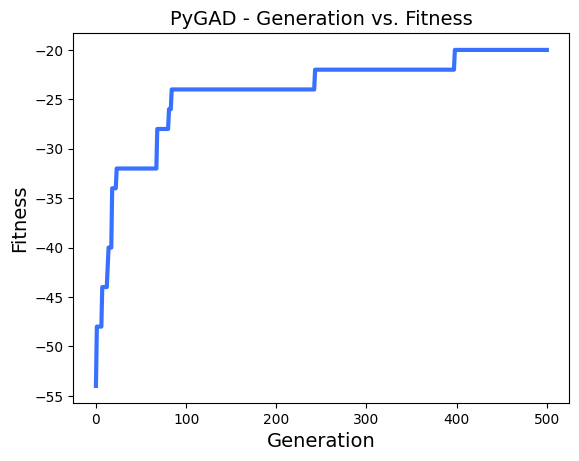

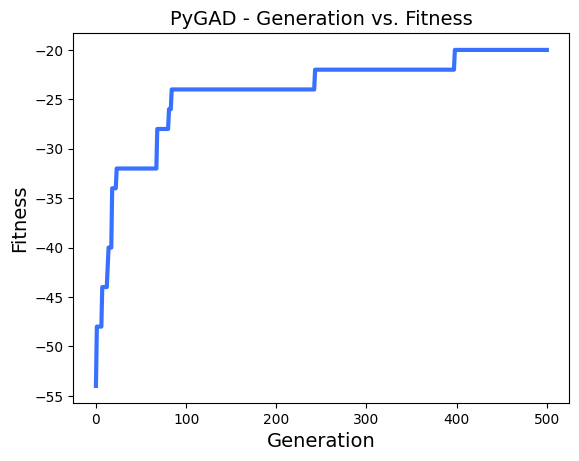

In [72]:
#podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

x, y, counter, walls, backtracks = path(solution) 
print("Position: ({x}, {y})".format(x=x, y=y))
print("Number of steps: {counter}".format(counter=counter))
print("Number of walls: {walls}".format(walls=walls))
print("Number of backtracks: {backtracks}".format(backtracks=backtracks))

#liczba generacji algorytmu
print("Number of generations passed is {generations_completed}".format(generations_completed=ga_instance.generations_completed))

#wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()